In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Loading MNIST dataset...


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

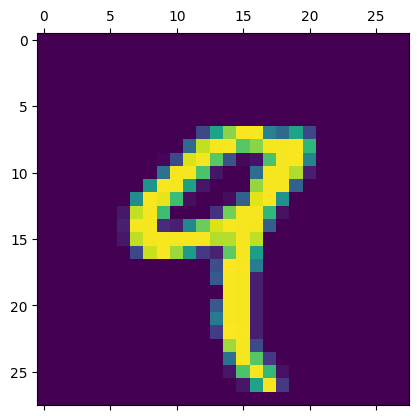

In [10]:
plt.matshow(x_train[4])

In [11]:
x_train = x_train / 255
x_test = x_test / 255

x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [12]:
# Improved Model with Multiple Hidden Layers and Optimizations
model = keras.Sequential([
    # First hidden layer - Feature extraction
    keras.layers.Dense(128, input_shape=(784,), activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    
    
    # Second hidden layer - Pattern recognition
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 
    
    
    # Third hidden layer - Feature refinement
    keras.layers.Dense(32, activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 
    
    
    # Output layer - Classification
    keras.layers.Dense(10, activation="softmax")  # Changed to softmax for multi-class
])

# Compile with optimized parameters
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Optimized learning rate
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model architecture
model.summary()

# Train with improved parameters
history = model.fit(
    x_train_flatten, y_train,
    epochs=30,           # More epochs for better learning
    batch_size=64,      # Optimal batch size
    validation_split=0.1,
    verbose=1
)

d:\amrita intern\tfenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,042 (437.66 KB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7923 - loss: 0.6946 - val_accuracy: 0.9527 - val_loss: 0.1724
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9122 - loss: 0.3075 - val_accuracy: 0.9642 - val_loss: 0.1213
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9314 - loss: 0.2384 - val_accuracy: 0.9677 - val_loss: 0.1019
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9411 - loss: 0.2013 - val_accuracy: 0.9743 - val_loss: 0.0897
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9482 - loss: 0.1786 - val_accuracy: 0.9738 - val_loss: 0.0864
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9530 - loss: 0.1614 - val_accuracy: 0.9742 - val_loss: 0.0839
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9566 - loss: 0.1494 - val_accuracy: 0.9785 - val_loss: 0.0714
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9597 - loss: 0.1391 - val_accuracy: 0.

In [13]:
print("\nEvaluating the model on the test set...")
test_loss, test_accuracy = model.evaluate(x_test_flatten, y_test, verbose=2)

# Get final training accuracy from history
train_accuracy = history.history['accuracy'][-1]

print("\n" + "="*60)
print(f"🎯 Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"🎯 Test Accuracy:     {test_accuracy * 100:.2f}%")
print(f"   Difference:        {abs(train_accuracy - test_accuracy) * 100:.2f}%")
print("="*60)


Evaluating the model on the test set...
313/313 - 1s - 2ms/step - accuracy: 0.9811 - loss: 0.0663

🎯 Training Accuracy: 97.97%
🎯 Test Accuracy:     98.11%
   Difference:        0.14%


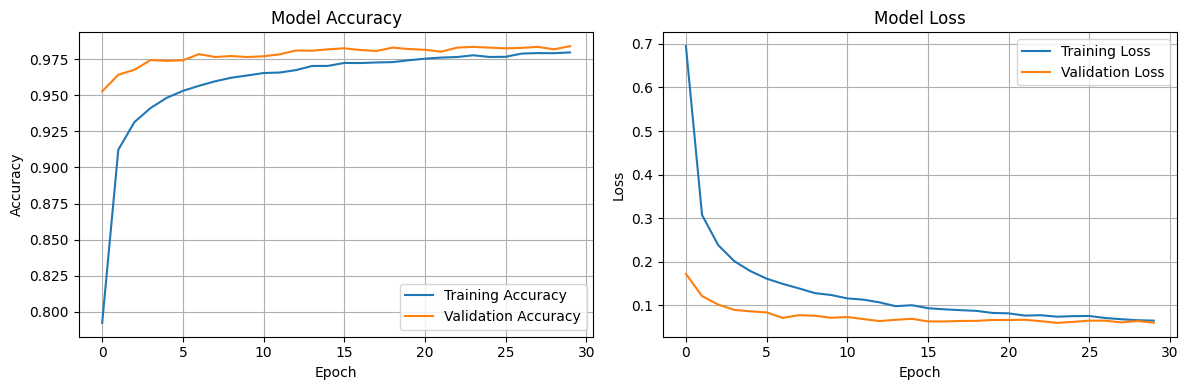

Final Training Accuracy: 97.97%
Final Validation Accuracy: 98.40%


In [14]:
# ...existing code...
# Plot training history to check for overfitting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
# ...existing code...